<a href="https://colab.research.google.com/github/Richardjmorton/colab/blob/master/mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
mnist = tf.keras.datasets.mnist


In [13]:
(x_train, ytrain), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.
x_test = x_test/255.

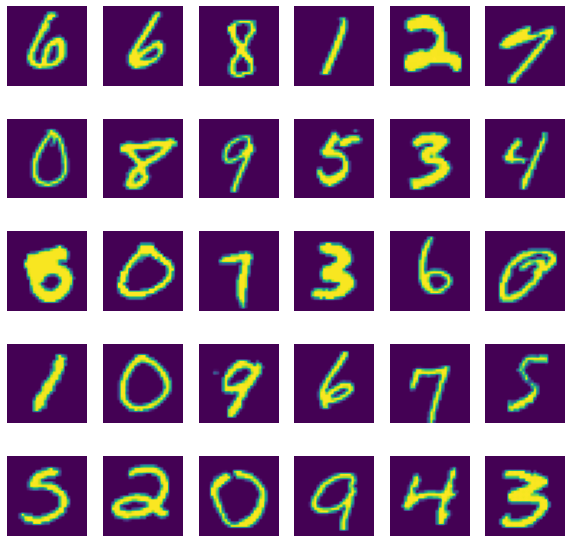

In [14]:
fig, ax = plt.subplots(5,6, figsize=(10,10))

x = stats.uniform.rvs(scale=60000, size=30)
x = x.astype(int)
for axes, j in zip(ax.flatten(), x):
    axes.imshow(x_train[j,:,:])
    axes.set_axis_off()
    axes.set_xlabel(str(ytrain[j]))

In [7]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
# Build model

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
hist = model.fit(x_train.reshape(60000,28*28), ytrain, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.5366 - accuracy: 0.9334 - val_loss: 1.5262 - val_accuracy: 0.9408
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.5212 - accuracy: 0.9456 - val_loss: 1.5164 - val_accuracy: 0.9503
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5117 - accuracy: 0.9544 - val_loss: 1.5112 - val_accuracy: 0.9531
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.5062 - accuracy: 0.9591 - val_loss: 1.5078 - val_accuracy: 0.9567
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5011 - accuracy: 0.9631 - val_loss: 1.5048 - val_accuracy: 0.9597
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.4977 - accuracy: 0.9665 - val_loss: 1.5018 - val_accuracy: 0.9622
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.4949 - accuracy: 0.9694 - val_loss: 1.5025 - val_accuracy:

In [ ]:
x_train.reshape(60000,28*28).shape

(60000, 784)

Text(0, 0.5, 'Loss')

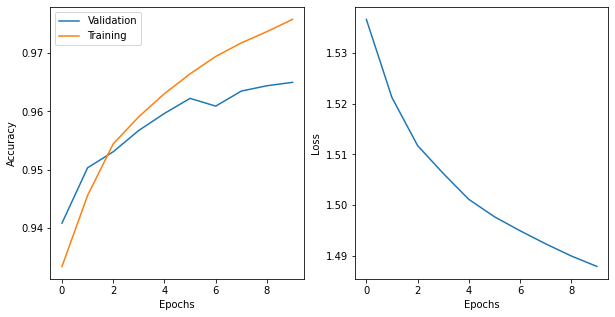

In [32]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(hist.history['val_accuracy'], label='Validation')
ax[0].plot(hist.history['accuracy'], label="Training")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(hist.history['loss'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

In [26]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])